In [1]:
import pandas as pd
import utils, os
from active_learning import ActiveLearning, plotting
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

%config InlineBackend.figure_format = 'svg'

In [2]:
settings = utils.load_settings(path="settings_sample.json")
cleaned_data_dir = settings["cleaned_data_dir"]
plots_dir = settings["plots_dir"]
features_dir = settings["features_dir"]

In [3]:
df = pd.read_parquet(os.path.join(cleaned_data_dir, "cleaned_dataset.parquet"))
df.drop(columns=["Accession ID", "col_date", "sub_date", 'country'], inplace=True)

In [4]:
features_path = os.path.join(features_dir, f"murugaiah_features.parquet")
X = utils.read_parquet_to_np(features_path)

le = LabelEncoder()
y = utils.read_parquet_to_np(os.path.join(cleaned_data_dir, "flat_labels.parquet"))
y = le.fit_transform(y.flatten())

In [5]:
start_date = '2020-03-29'
n_days_delta = 5

In [6]:
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
variant_detector = ActiveLearning(
    base_estimator=base_estimator, 
    budget=10,
    decoder=le,
)

In [8]:
variant_detector.fit(
    X=X, 
    y=y,
    dates=df['date'],
    initial_date=start_date,
    timestep=n_days_delta,
)

25-May-24 11:52:15 - Current_date = 2020-03-29 00:00:00, t = 0
25-May-24 11:52:15 - Training the base estimator on 269 samples...
25-May-24 11:52:16 - Predicting on 84 samples...
25-May-24 11:52:16 - Missed lineages: ['B.1.1.10', 'B.1.1.57']
25-May-24 11:52:16 - Current_date = 2020-04-03 00:00:00, t = 1
25-May-24 11:52:16 - Training the base estimator on 353 samples...
25-May-24 11:52:16 - Predicting on 56 samples...
25-May-24 11:52:16 - Reporting lineage B.1.428.2
25-May-24 11:52:16 - Reporting lineage B.38
25-May-24 11:52:16 - Missed lineages: ['B.1.1.1.8', 'B.1.1.33', 'B.1.379', 'B.1.149']
25-May-24 11:52:16 - Current_date = 2020-04-08 00:00:00, t = 2
25-May-24 11:52:16 - Training the base estimator on 409 samples...
25-May-24 11:52:16 - Predicting on 43 samples...
25-May-24 11:52:16 - Reporting lineage B.1.84
25-May-24 11:52:16 - Missed lineages: ['A.12', 'A.21', 'B.1.1.189']
25-May-24 11:52:16 - Current_date = 2020-04-13 00:00:00, t = 3
25-May-24 11:52:16 - Training the base estim

KeyboardInterrupt: 

## Testing plotting and logger

In [42]:
# Data
data = {'Variant': ['A', 'B', 'C'],
        'Traditional': ['2020-04-15', '2020-05-10', '2020-06-05'],
        'Model': ['2020-04-10', '2020-05-08', '2020-06-10']}

df = pd.DataFrame(data)
df['Traditional'] = pd.to_datetime(df['Traditional'])
df['Model'] = pd.to_datetime(df['Model'])
df['Time Lag'] = (df['Traditional'] - df['Model']).dt.days


In [43]:
# Summary statistics
mean_lag = df['Time Lag'].mean()
median_lag = df['Time Lag'].median()
std_lag = df['Time Lag'].std()

print(f"Mean Time Lag: {mean_lag} days")
print(f"Median Time Lag: {median_lag} days")
print(f"Standard Deviation: {std_lag} days")

Mean Time Lag: 0.6666666666666666 days
Median Time Lag: 2.0 days
Standard Deviation: 5.131601439446884 days


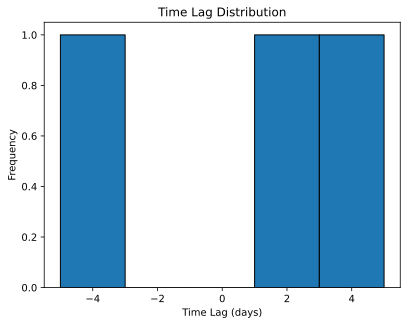

In [35]:
# Histogram
plotting.lags_histogram(
    lags=df['Time Lag'], 
    bins=5, 
    title='Time Lag Distribution', 
    xlabel='Time Lag (days)', 
    ylabel='Frequency',
    save=False,
)

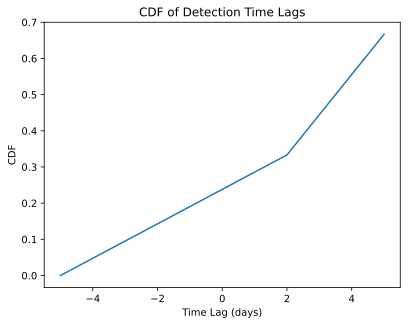

In [36]:
# CDF
plotting.lags_cdf(
    lags=df['Time Lag'], 
    title='CDF of Detection Time Lags', 
    xlabel='Time Lag (days)', 
    ylabel='CDF',
    save=False,
)

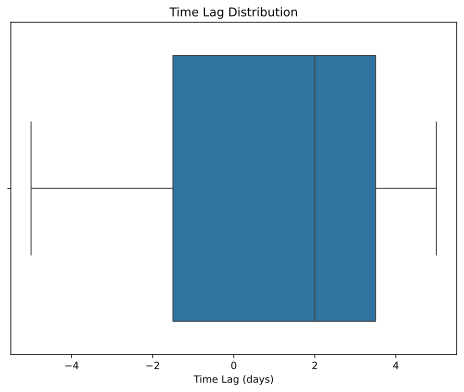

In [37]:
# Box Plot
plotting.lags_boxplot(
    lags=df['Time Lag'], 
    title='Time Lag Distribution', 
    xlabel='Time Lag (days)',
    save=False,
)

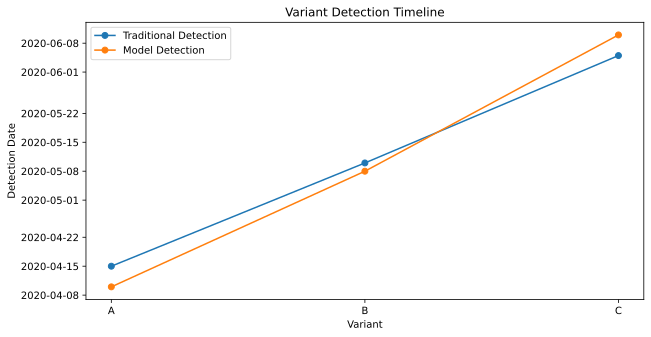

In [40]:
# Time Series Plot
plotting.variants_detection_timeline(
    variants=df['Variant'],
    traditional_detection=df['Traditional'],
    model_detection=df['Model'],
    save=False,
)